In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [30]:
import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials
AMZN = yf.download('AMZN', 
                      start='2013-01-01', 
                      end='2022-08-10', 
                      progress=False)
# AMZN = yf.download('AMZN') for all 
all_data = AMZN[['Adj Close','Open', 'High', 'Low', 'Close', 'Volume']].round(2)
all_data.head(10)

,Adj Close,Open,High,Low,Close,Volume
Date,,,,,,
2012-12-31,12.54,12.19,12.62,12.14,12.54,68380000
2013-01-02,12.87,12.80,12.90,12.66,12.87,65420000
2013-01-03,12.92,12.86,13.04,12.82,12.92,55018000
2013-01-04,12.96,12.88,12.99,12.83,12.96,37484000
2013-01-07,13.42,13.15,13.49,13.13,13.42,98200000
2013-01-08,13.32,13.35,13.45,13.18,13.32,60214000
2013-01-09,13.32,13.41,13.48,13.27,13.32,45312000
2013-01-10,13.27,13.43,13.44,13.11,13.27,57268000
2013-01-11,13.40,13.26,13.42,13.21,13.40,48266000


In [31]:
all_data.tail()

,Adj Close,Open,High,Low,Close,Volume
Date,,,,,,
2022-08-03,139.52,136.21,140.49,136.05,139.52,71827800
2022-08-04,142.57,140.58,143.56,139.55,142.57,70585000
2022-08-05,140.80,140.10,142.86,139.60,140.80,50650100
2022-08-08,139.41,142.05,144.23,138.29,139.41,52229000
2022-08-09,137.83,138.05,138.95,136.21,137.83,40395900


<AxesSubplot:xlabel='Date'>

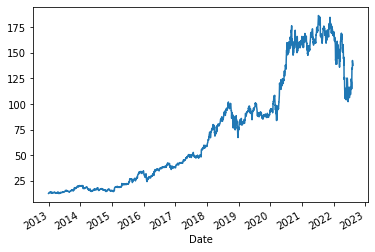

In [32]:
all_data['Adj Close'].plot()

In [33]:
print("There are "+ str(all_data[:'2020'].shape[0]) + " observations in the training data")
print("There are "+ str(all_data['2021':].shape[0]) + " observations in the test data")

There are 2016 observations in the training data
There are 403 observations in the test data


In [34]:
import numpy as np

In [35]:
def ts_train_test(all_data,time_steps,for_periods):
    '''
    input: 
      data: dataframe with dates and price data
    output:
      X_train, y_train: data from 2013/1/1-2018/12/31
      X_test:  data from 2019 -
      sc:      insantiated MinMaxScaler object fit to the training data
    '''
    # create training and test set
    ts_train = all_data[:'2020'].iloc[:,0:1].values
    ts_test  = all_data['2021':].iloc[:,0:1].values
    ts_train_len = len(ts_train)
    ts_test_len = len(ts_test)

    # create training data of s samples and t time steps
    X_train = []
    y_train = []
    y_train_stacked = []
    for i in range(time_steps,ts_train_len-1): 
        X_train.append(ts_train[i-time_steps:i,0])
        y_train.append(ts_train[i:i+for_periods,0])
    X_train, y_train = np.array(X_train), np.array(y_train)

    # Reshaping X_train for efficient modelling
    X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

    inputs = pd.concat((all_data["Adj Close"][:'2020'], all_data["Adj Close"]['2021':]),axis=0).values
    inputs = inputs[len(inputs)-len(ts_test) - time_steps:]
    inputs = inputs.reshape(-1,1)

    # Preparing X_test
    X_test = []
    for i in range(time_steps,ts_test_len+time_steps-for_periods):
        X_test.append(inputs[i-time_steps:i,0])
        
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

    return X_train, y_train , X_test

X_train, y_train, X_test = ts_train_test(all_data,5,2)
X_train.shape[0],X_train.shape[1]

(2010, 5)

In [36]:
# Make the 3-D shape to a data frame so we can see: 
X_train_see = pd.DataFrame(np.reshape(X_train, (X_train.shape[0],X_train.shape[1])))
y_train_see = pd.DataFrame(y_train)
pd.concat([X_train_see,y_train_see],axis=1)

,0,1,2,3,4,0,1
0,12.54,12.87,12.92,12.96,13.42,13.32,13.32
1,12.87,12.92,12.96,13.42,13.32,13.32,13.27
2,12.92,12.96,13.42,13.32,13.32,13.27,13.40
3,12.96,13.42,13.32,13.32,13.27,13.40,13.64
4,13.42,13.32,13.32,13.27,13.40,13.64,13.60
...,...,...,...,...,...,...,...
2005,162.05,161.80,160.08,160.31,160.33,159.26,158.63
2006,161.80,160.08,160.31,160.33,159.26,158.63,164.20
2007,160.08,160.31,160.33,159.26,158.63,164.20,166.10
2008,160.31,160.33,159.26,158.63,164.20,166.10,164.29


In [37]:
# Make the 3-D shape to a data frame so we can see: 
X_test_see = pd.DataFrame(np.reshape(X_test, (X_test.shape[0],X_test.shape[1])))
pd.DataFrame(X_test_see)

,0,1,2,3,4
0,158.63,164.20,166.10,164.29,162.85
1,164.20,166.10,164.29,162.85,159.33
2,166.10,164.29,162.85,159.33,160.93
3,164.29,162.85,159.33,160.93,156.92
4,162.85,159.33,160.93,156.92,158.11
...,...,...,...,...,...
396,121.14,114.81,120.97,122.28,134.95
397,114.81,120.97,122.28,134.95,135.39
398,120.97,122.28,134.95,135.39,134.16
399,122.28,134.95,135.39,134.16,139.52


In [38]:
print("There are " + str(X_train.shape[0]) + " samples in the training data")
print("There are " + str(X_test.shape[0]) + " samples in the test data")

There are 2010 samples in the training data
There are 401 samples in the test data


In [39]:
def simple_rnn_model(X_train, y_train, X_test):
    '''
    create single layer rnn model trained on X_train and y_train
    and make predictions on the X_test data
    '''
    # create a model
    from keras.models import Sequential
    from keras.layers import Dense, SimpleRNN
    
    my_rnn_model = Sequential()
    my_rnn_model.add(SimpleRNN(32, return_sequences=True))
    #my_rnn_model.add(SimpleRNN(32, return_sequences=True))
    #my_rnn_model.add(SimpleRNN(32, return_sequences=True))
    my_rnn_model.add(SimpleRNN(32))
    my_rnn_model.add(Dense(2)) # The time step of the output

    my_rnn_model.compile(optimizer='rmsprop', loss='mean_squared_error')

    # fit the RNN model
    my_rnn_model.fit(X_train, y_train, epochs=100, batch_size=150, verbose=0)

    # Finalizing predictions
    rnn_predictions = my_rnn_model.predict(X_test)

    return my_rnn_model, rnn_predictions

my_rnn_model, rnn_predictions = simple_rnn_model(X_train, y_train, X_test)
rnn_predictions[1:10]

array([[50.074265, 48.661026],
       [50.074272, 48.661026],
       [50.074265, 48.661026],
       [50.07427 , 48.661026],
       [50.07427 , 48.661026],
       [50.074265, 48.661026],
       [50.074265, 48.661026],
       [50.074265, 48.661026],
       [50.074265, 48.661026]], dtype=float32)

(2770.1252, <AxesSubplot:xlabel='Date'>)

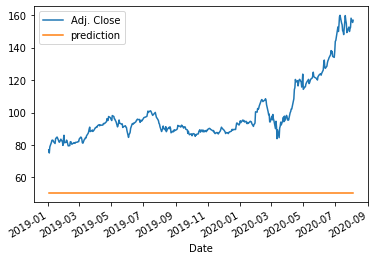

In [40]:
def actual_pred_plot(preds):
    actual_pred = pd.DataFrame(columns = ['Adj. Close', 'prediction'])
    actual_pred['Adj. Close'] = all_data.loc['2019':,'Adj Close'][0:len(preds)]
    actual_pred['prediction'] = preds[:,0]

    from keras.metrics import MeanSquaredError
    m = MeanSquaredError()
    m.update_state(np.array(actual_pred['Adj. Close']),np.array(actual_pred['prediction']))
    
    return (m.result().numpy(), actual_pred.plot() )
    
actual_pred_plot(rnn_predictions)  

In [41]:
def ts_train_test_normalize(all_data,time_steps,for_periods):
    '''
    input: 
      data: dataframe with dates and price data
    output:
      X_train, y_train: data from 2013/1/1-2018/12/31
      X_test:  data from 2019 -
      sc:      insantiated MinMaxScaler object fit to the training data
    '''
    # create training and test set
    ts_train = all_data[:'2020'].iloc[:,0:1].values
    ts_test  = all_data['2021':].iloc[:,0:1].values
    ts_train_len = len(ts_train)
    ts_test_len = len(ts_test)

    # scale the data
    from sklearn.preprocessing import MinMaxScaler
    sc = MinMaxScaler(feature_range=(0,1))
    ts_train_scaled = sc.fit_transform(ts_train)

    # create training data of s samples and t time steps
    X_train = []
    y_train = []
    y_train_stacked = []
    for i in range(time_steps,ts_train_len-1): 
        X_train.append(ts_train_scaled[i-time_steps:i,0])
        y_train.append(ts_train_scaled[i:i+for_periods,0])
    X_train, y_train = np.array(X_train), np.array(y_train)

    # Reshaping X_train for efficient modelling
    X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

    inputs = pd.concat((all_data["Adj Close"][:'2020'], all_data["Adj Close"]['2021':]),axis=0).values
    inputs = inputs[len(inputs)-len(ts_test) - time_steps:]
    inputs = inputs.reshape(-1,1)
    inputs  = sc.transform(inputs)

    # Preparing X_test
    X_test = []
    for i in range(time_steps,ts_test_len+time_steps-for_periods):
        X_test.append(inputs[i-time_steps:i,0])
        
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

    return X_train, y_train , X_test, sc



In [42]:
 # create training and test set
ts_train = all_data[:'2020'].iloc[:,0:1].values
ts_test  = all_data['2021':].iloc[:,0:1].values
ts_train_len = len(ts_train)
ts_test_len = len(ts_test)

# scale the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
ts_train_scaled = sc.fit_transform(ts_train)

C:\Users\HP\AppData\Roaming\Python\Python36\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


(64169576.0, <AxesSubplot:xlabel='Date'>)

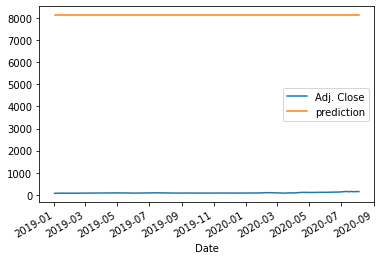

In [43]:

def LSTM_model(X_train, y_train, X_test, sc):
    # create a model
    from keras.models import Sequential
    from keras.layers import Dense, SimpleRNN, GRU, LSTM
    from tensorflow.keras.optimizers import SGD

   
    
    # The LSTM architecture
    my_LSTM_model = Sequential()
    my_LSTM_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    #my_LSTM_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    #my_LSTM_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    my_LSTM_model.add(LSTM(units=50, activation='tanh'))
    my_LSTM_model.add(Dense(units=2))

    # Compiling
    my_LSTM_model.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
    # Fitting to the training set
    my_LSTM_model.fit(X_train,y_train,epochs=50,batch_size=150, verbose=0)

    LSTM_prediction = my_LSTM_model.predict(X_test)
    LSTM_prediction = sc.inverse_transform(LSTM_prediction)

    return my_LSTM_model, LSTM_prediction

my_LSTM_model, LSTM_prediction = LSTM_model(X_train, y_train, X_test, sc)
LSTM_prediction[1:10]
actual_pred_plot(LSTM_prediction)  

C:\Users\HP\AppData\Roaming\Python\Python36\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


(95986820.0, <AxesSubplot:xlabel='Date'>)

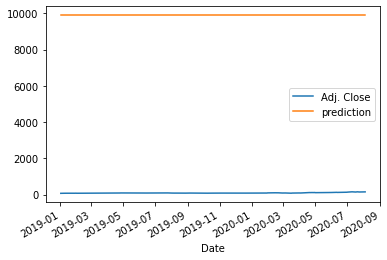

In [44]:
def GRU_model(X_train, y_train, X_test, sc):
    # create a model
    from keras.models import Sequential
    from keras.layers import Dense, SimpleRNN, GRU
    from tensorflow.keras.optimizers import SGD    
    # The GRU architecture
    my_GRU_model = Sequential()
    # First GRU layer with Dropout regularisation
    my_GRU_model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    #my_GRU_model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    #my_GRU_model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    my_GRU_model.add(GRU(units=50, activation='tanh'))
    my_GRU_model.add(Dense(units=2))

    # Compiling the RNN
    my_GRU_model.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
    # Fitting to the training set
    my_GRU_model.fit(X_train,y_train,epochs=50,batch_size=150, verbose=0)

    GRU_prediction = my_GRU_model.predict(X_test)
    GRU_prediction = sc.inverse_transform(GRU_prediction)

    return my_GRU_model, GRU_prediction

my_GRU_model, GRU_prediction = GRU_model(X_train, y_train, X_test, sc)
GRU_prediction[1:10]
actual_pred_plot(GRU_prediction)  

In [45]:
GRU_prediction[1:10]

array([[9896.585, 9915.92 ],
       [9896.585, 9915.92 ],
       [9896.585, 9915.92 ],
       [9896.585, 9915.92 ],
       [9896.585, 9915.92 ],
       [9896.585, 9915.92 ],
       [9896.585, 9915.92 ],
       [9896.585, 9915.92 ],
       [9896.585, 9915.92 ]], dtype=float32)